<a href="https://colab.research.google.com/github/Pritam-BA/DAY1/blob/main/DAY10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

def create_byjus_student_data():
    """Create realistic BYJU'S student performance dataset"""
    n_students = 2000  # Student records

    # Major Indian cities where BYJU'S operates
    cities = ['Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Hyderabad',
              'Pune', 'Kolkata', 'Ahmedabad', 'Jaipur', 'Lucknow']

    # BYJU'S course offerings
    courses = ['Mathematics', 'Science', 'English', 'Coding', 'Physics', 'Chemistry']

    # Student grades/classes
    grades = [6, 7, 8, 9, 10, 11, 12]

    # Device types for learning
    devices = ['Tablet', 'Smartphone', 'Laptop', 'Desktop']

    # Subscription plans
    plans = ['Basic', 'Premium', 'Plus']

    data = []

    for student_id in range(1, n_students + 1):
        city = np.random.choice(cities)
        course = np.random.choice(courses)
        grade = np.random.choice(grades)
        device = np.random.choice(devices, p=[0.4, 0.35, 0.2, 0.05])  # Realistic device distribution
        plan = np.random.choice(plans, p=[0.5, 0.3, 0.2])  # Most students on basic plan

        # Realistic performance metrics with city-based variations
        city_multipliers = {
            'Delhi': 1.1, 'Mumbai': 1.05, 'Bangalore': 1.15, 'Chennai': 1.08,
            'Hyderabad': 1.06, 'Pune': 1.03, 'Kolkata': 0.98, 'Ahmedabad': 1.02,
            'Jaipur': 0.96, 'Lucknow': 0.94
        }

        # Course difficulty factors
        course_factors = {
            'Mathematics': 0.9, 'Science': 0.95, 'English': 1.1,
            'Coding': 0.85, 'Physics': 0.88, 'Chemistry': 0.92
        }

        # Plan benefits
        plan_benefits = {'Basic': 1.0, 'Premium': 1.15, 'Plus': 1.25}

        # Device learning effectiveness
        device_effectiveness = {'Tablet': 1.1, 'Smartphone': 0.9, 'Laptop': 1.2, 'Desktop': 1.05}

        # Calculate performance metrics
        base_score = 70
        final_score = (base_score * city_multipliers[city] * course_factors[course] *
                      plan_benefits[plan] * device_effectiveness[device] *
                      np.random.uniform(0.8, 1.2))

        test_score = np.clip(final_score, 30, 100)

        # Completion rate (influenced by engagement factors)
        base_completion = 0.75
        completion_rate = np.clip(base_completion * city_multipliers[city] *
                                plan_benefits[plan] * np.random.uniform(0.7, 1.3), 0.3, 1.0)

        # Study hours per week
        study_hours = np.random.normal(8, 3) * plan_benefits[plan]
        study_hours = np.clip(study_hours, 2, 20)

        data.append({
            'student_id': student_id,
            'city': city,
            'course': course,
            'grade': grade,
            'device_type': device,
            'subscription_plan': plan,
            'test_score': round(test_score, 1),
            'completion_rate': round(completion_rate, 2),
            'study_hours_per_week': round(study_hours, 1),
            'monthly_sessions': np.random.poisson(15) + 5
        })

    return pd.DataFrame(data)

# Create the dataset
student_data = create_byjus_student_data()
print("BYJU'S Student Performance Dataset Created!")
print(f"Dataset Shape: {student_data.shape}")
print("\nFirst 5 records:")
print(student_data.head())


BYJU'S Student Performance Dataset Created!
Dataset Shape: (2000, 10)

First 5 records:
   student_id       city     course  grade device_type subscription_plan  \
0           1    Kolkata     Coding     10      Tablet           Premium   
1           2  Bangalore  Chemistry     10     Desktop              Plus   
2           3       Pune    Physics      9      Tablet           Premium   
3           4    Kolkata    Physics      6      Tablet              Plus   
4           5    Chennai     Coding     12  Smartphone           Premium   

   test_score  completion_rate  study_hours_per_week  monthly_sessions  
0        76.6             0.82                   8.9                18  
1        86.0             0.87                   6.5                16  
2        77.0             0.65                  10.0                20  
3        98.5             1.00                   7.1                18  
4        75.4             0.75                   5.1                23  


In [9]:
print("\n" + "="*60)
print("=== BASIC GROUPBY OPERATIONS ===")
print("="*60)

# Single column groupby - performance by city
city_performance = student_data.groupby('city').agg({
    'test_score': ['mean', 'median', 'std'],
    'completion_rate': 'mean',
    'study_hours_per_week': 'mean',
    'student_id': 'count'
}).round(2)

city_performance.columns = ['Mean_Score', 'Median_Score', 'Score_StdDev',
                          'Avg_Completion', 'Avg_Study_Hours', 'Student_Count']
city_performance = city_performance.sort_values('Mean_Score', ascending=False)

print("Performance by City:")
print(city_performance)

# Course-wise performance
course_performance = student_data.groupby('course').agg({
    'test_score': 'mean',
    'completion_rate': 'mean',
    'student_id': 'count'
}).round(2)

course_performance.columns = ['Avg_Test_Score', 'Avg_Completion', 'Student_Count']
course_performance = course_performance.sort_values('Avg_Test_Score', ascending=False)

print(f"\nPerformance by Course:")
print(course_performance)



=== BASIC GROUPBY OPERATIONS ===
Performance by City:
           Mean_Score  Median_Score  Score_StdDev  Avg_Completion  \
city                                                                
Bangalore       83.19         83.80         13.48            0.90   
Delhi           80.44         81.00         14.50            0.87   
Chennai         79.34         79.00         13.77            0.86   
Hyderabad       79.18         76.85         15.20            0.85   
Pune            76.32         76.60         13.97            0.82   
Mumbai          75.66         74.50         12.72            0.83   
Ahmedabad       75.35         74.35         13.65            0.80   
Kolkata         74.02         72.10         14.26            0.82   
Jaipur          71.70         70.50         14.03            0.78   
Lucknow         69.18         68.90         13.64            0.77   

           Avg_Study_Hours  Student_Count  
city                                       
Bangalore             9.19  

In [10]:
print("\n" + "="*60)
print("=== MULTI-LEVEL GROUPBY OPERATIONS ===")
print("="*60)

# Multi-level groupby: City and Course performance
performance_by_city_course = student_data.groupby(['city', 'course']).agg({
    'test_score': 'mean',
    'completion_rate': 'mean',
    'student_id': 'count'
}).round(2)

performance_by_city_course.columns = ['Avg_Test_Score', 'Avg_Completion', 'Student_Count']

print("Top 10 City-Course Combinations by Test Score:")
top_combinations = performance_by_city_course.sort_values('Avg_Test_Score', ascending=False).head(10)
print(top_combinations)

# Device effectiveness analysis
device_effectiveness = student_data.groupby('device_type').agg({
    'test_score': ['mean', 'median'],
    'completion_rate': 'mean',
    'study_hours_per_week': 'mean'
}).round(2)

device_effectiveness.columns = ['Mean_Score', 'Median_Score', 'Completion_Rate', 'Study_Hours']
device_effectiveness = device_effectiveness.sort_values('Mean_Score', ascending=False)

print(f"\nDevice Effectiveness Analysis:")
print(device_effectiveness)



=== MULTI-LEVEL GROUPBY OPERATIONS ===
Top 10 City-Course Combinations by Test Score:
                     Avg_Test_Score  Avg_Completion  Student_Count
city      course                                                  
Hyderabad English             93.46            0.89             39
Delhi     English             92.86            0.87             27
Bangalore English             89.01            0.89             28
Pune      English             88.97            0.85             27
Chennai   English             88.41            0.88             31
Ahmedabad English             85.47            0.81             31
Bangalore Chemistry           85.42            0.86             34
          Science             85.35            0.92             30
Delhi     Science             83.74            0.89             25
Mumbai    English             83.28            0.83             25

Device Effectiveness Analysis:
             Mean_Score  Median_Score  Completion_Rate  Study_Hours
device_ty

In [11]:
print("\n" + "="*60)
print("=== ADVANCED PIVOT TABLES ===")
print("="*60)

# Pivot table: City vs Course performance
city_course_pivot = pd.pivot_table(
    student_data,
    values='test_score',
    index='city',
    columns='course',
    aggfunc='mean'
).round(1)

print("City vs Course Performance Pivot Table:")
print(city_course_pivot)

# Pivot table with multiple metrics
multi_metric_pivot = pd.pivot_table(
    student_data,
    values=['test_score', 'completion_rate'],
    index='subscription_plan',
    columns='device_type',
    aggfunc='mean'
).round(2)

print(f"\nSubscription Plan vs Device Performance:")
print(multi_metric_pivot)

# Grade-wise course popularity pivot
course_popularity = pd.pivot_table(
    student_data,
    values='student_id',
    index='grade',
    columns='course',
    aggfunc='count',
    fill_value=0
)

print(f"\nCourse Popularity by Grade (Student Count):")
print(course_popularity)



=== ADVANCED PIVOT TABLES ===
City vs Course Performance Pivot Table:
course     Chemistry  Coding  English  Mathematics  Physics  Science
city                                                                
Ahmedabad       70.5    72.8     85.5         74.0     69.6     78.5
Bangalore       85.4    73.8     89.0         82.3     82.1     85.4
Chennai         80.0    74.5     88.4         76.5     75.5     81.6
Delhi           77.6    74.1     92.9         80.7     77.2     83.7
Hyderabad       72.8    72.8     93.5         80.5     72.7     82.0
Jaipur          72.4    67.8     81.6         67.1     67.5     74.5
Kolkata         74.4    64.1     82.5         74.3     72.6     75.9
Lucknow         69.2    63.4     82.3         66.6     66.4     69.7
Mumbai          74.1    72.4     83.3         77.6     74.5     74.4
Pune            74.1    74.5     89.0         73.6     74.4     76.1

Subscription Plan vs Device Performance:
                  completion_rate                          

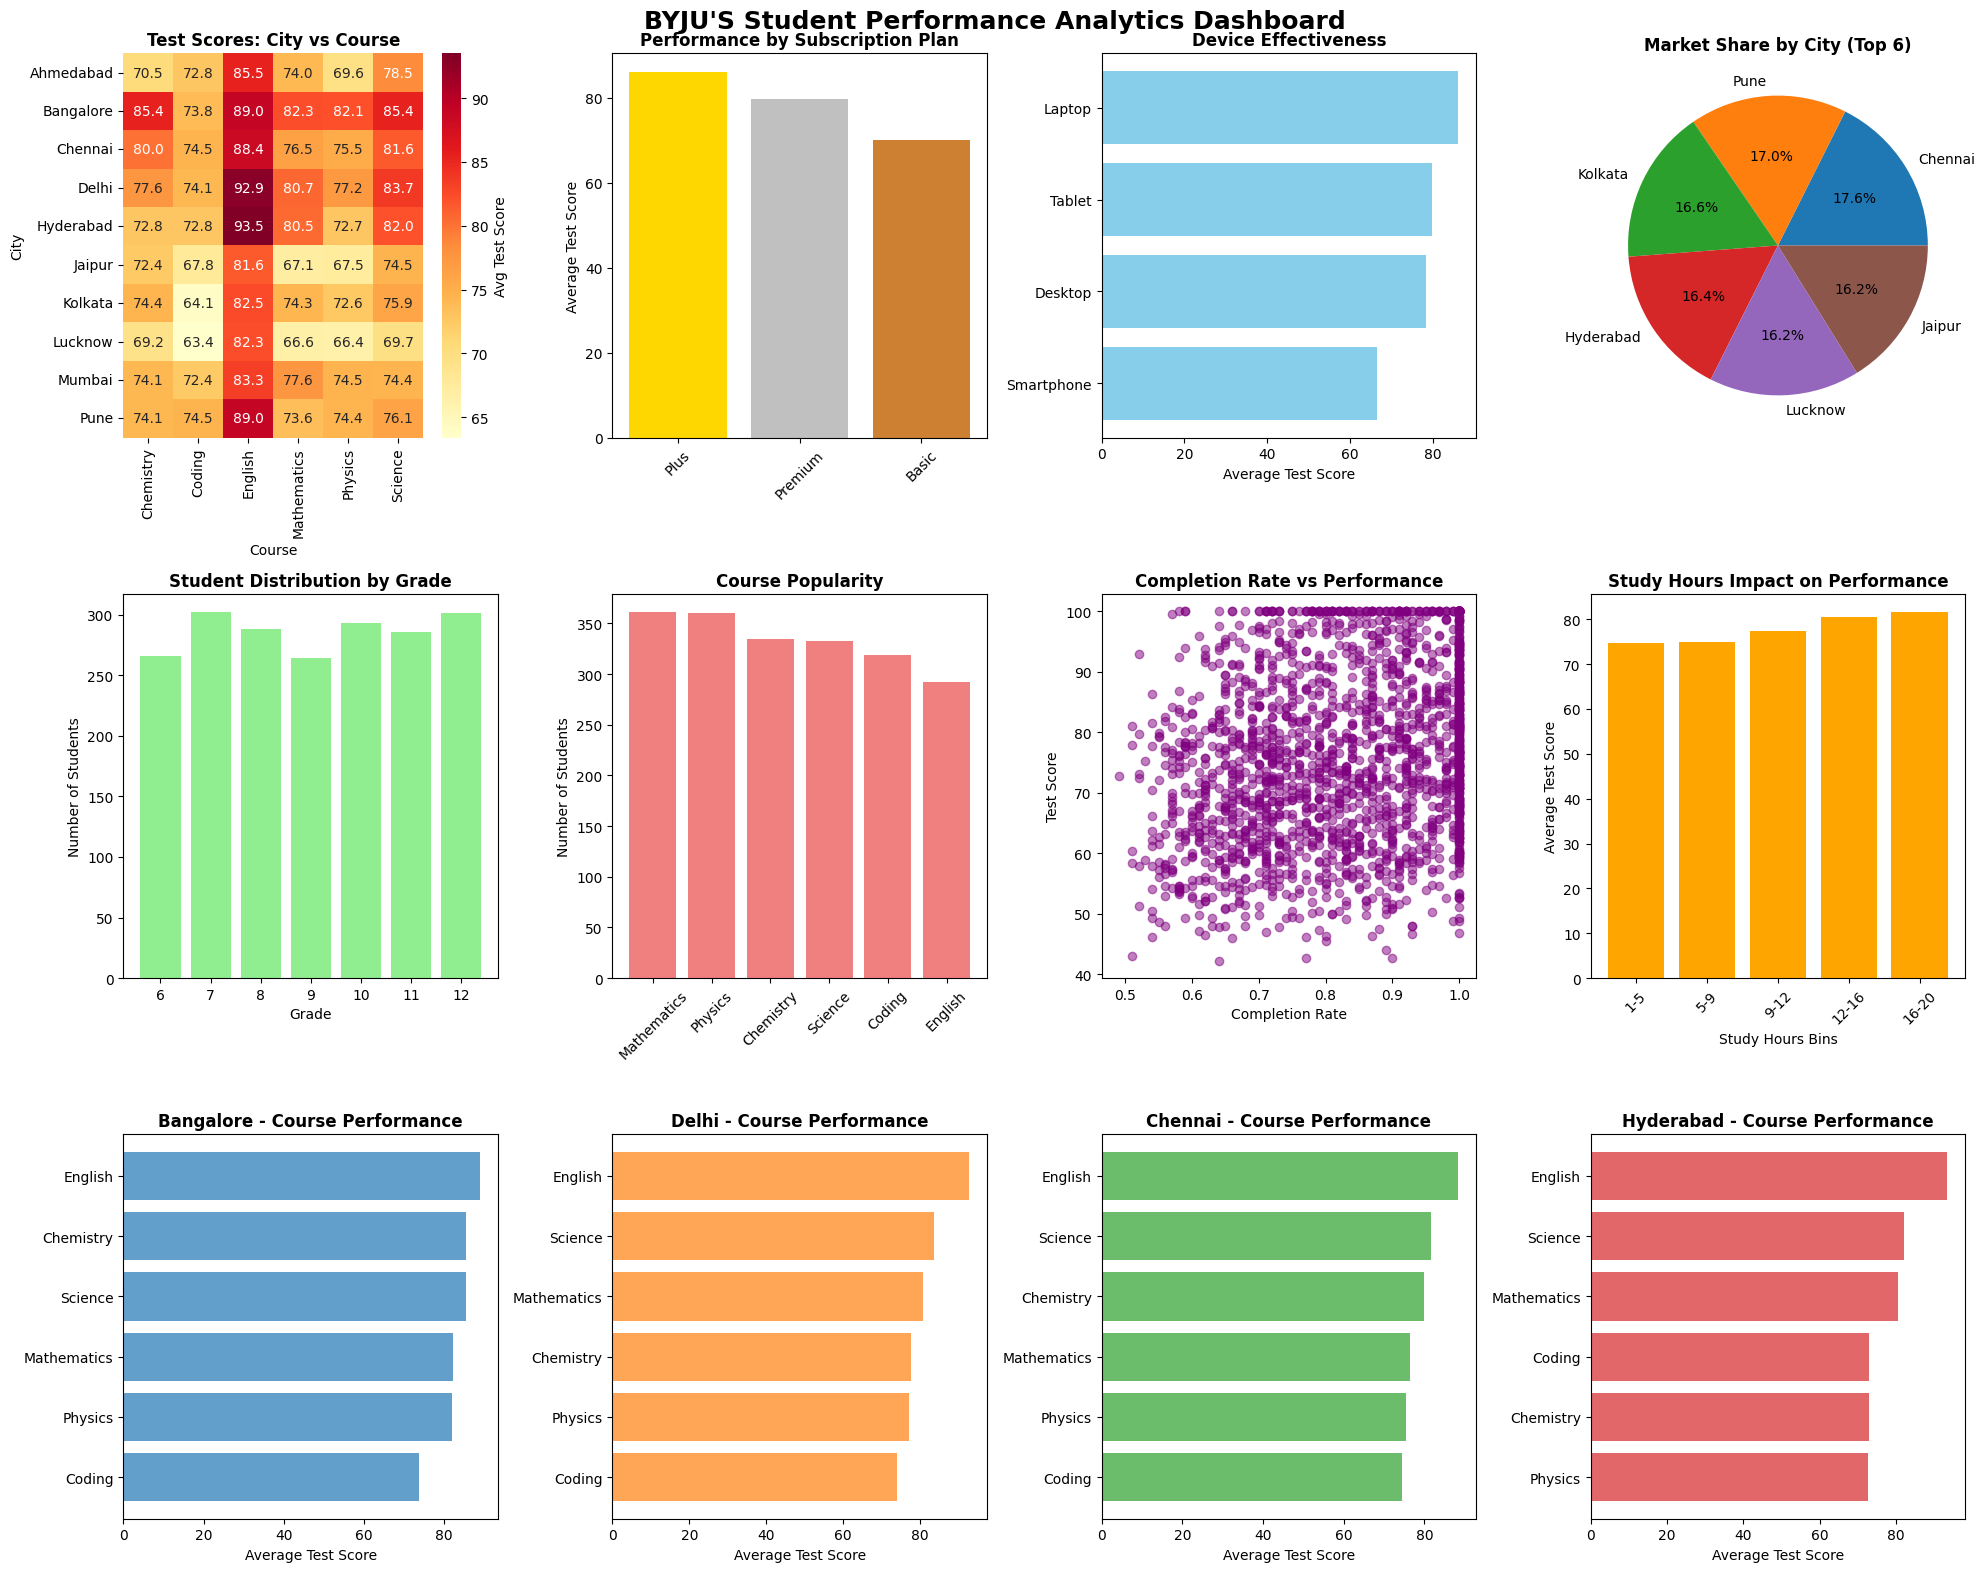


=== KEY PERFORMANCE INDICATORS ===
📊 Total Students: 2,000
🏆 Best Performing City: Bangalore (Score: 83.19)
📚 Most Popular Course: Mathematics
💻 Best Learning Device: Laptop (Score: 86.07)
⭐ Premium Plan Adoption: 51.0%
📈 Overall Completion Rate: 82.9%


In [12]:
# Create comprehensive visualization dashboard with corrected colors
plt.style.use('default')
fig = plt.figure(figsize=(20, 16))

# 1. City Performance Heatmap
ax1 = plt.subplot(3, 4, 1)
city_course_heatmap = city_course_pivot.fillna(0)
sns.heatmap(city_course_heatmap, annot=True, fmt='.1f', cmap='YlOrRd',
           cbar_kws={'label': 'Avg Test Score'})
plt.title('Test Scores: City vs Course', fontweight='bold')
plt.xlabel('Course')
plt.ylabel('City')

# 2. Subscription Plan Performance (Fixed color issue)
ax2 = plt.subplot(3, 4, 2)
plan_performance = student_data.groupby('subscription_plan')['test_score'].mean().sort_values(ascending=False)
# Using valid color codes instead of 'bronze'
colors = ['gold', 'silver', '#CD7F32']  # Gold, Silver, Bronze hex code
plt.bar(plan_performance.index, plan_performance.values, color=colors[:len(plan_performance)])
plt.title('Performance by Subscription Plan', fontweight='bold')
plt.ylabel('Average Test Score')
plt.xticks(rotation=45)

# 3. Device Effectiveness
ax3 = plt.subplot(3, 4, 3)
device_scores = device_effectiveness['Mean_Score'].sort_values(ascending=True)
plt.barh(device_scores.index, device_scores.values, color='skyblue')
plt.title('Device Effectiveness', fontweight='bold')
plt.xlabel('Average Test Score')

# 4. City Market Share
ax4 = plt.subplot(3, 4, 4)
city_students = student_data['city'].value_counts()
plt.pie(city_students.head(6).values, labels=city_students.head(6).index, autopct='%1.1f%%')
plt.title('Market Share by City (Top 6)', fontweight='bold')

# 5. Grade Distribution
ax5 = plt.subplot(3, 4, 5)
grade_dist = student_data['grade'].value_counts().sort_index()
plt.bar(grade_dist.index, grade_dist.values, color='lightgreen')
plt.title('Student Distribution by Grade', fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Number of Students')

# 6. Course Popularity
ax6 = plt.subplot(3, 4, 6)
course_pop = student_data['course'].value_counts()
plt.bar(course_pop.index, course_pop.values, color='lightcoral')
plt.title('Course Popularity', fontweight='bold')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)

# 7. Completion Rate vs Test Score
ax7 = plt.subplot(3, 4, 7)
plt.scatter(student_data['completion_rate'], student_data['test_score'], alpha=0.5, color='purple')
plt.xlabel('Completion Rate')
plt.ylabel('Test Score')
plt.title('Completion Rate vs Performance', fontweight='bold')

# 8. Study Hours Impact
ax8 = plt.subplot(3, 4, 8)
study_bins = pd.cut(student_data['study_hours_per_week'], bins=5)
study_impact = student_data.groupby(study_bins)['test_score'].mean()
plt.bar(range(len(study_impact)), study_impact.values, color='orange')
plt.title('Study Hours Impact on Performance', fontweight='bold')
plt.xlabel('Study Hours Bins')
plt.ylabel('Average Test Score')
# Fixed the x-axis labels
plt.xticks(range(len(study_impact)),
          [f'{int(x.left)}-{int(x.right)}' for x in study_impact.index], rotation=45)

# 9-12. Individual City Performance
top_cities = city_performance.head(4).index
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Using valid matplotlib colors

for i, (city, color) in enumerate(zip(top_cities, colors)):
    ax = plt.subplot(3, 4, 9+i)
    city_data = student_data[student_data['city'] == city]
    course_scores = city_data.groupby('course')['test_score'].mean().sort_values(ascending=True)
    plt.barh(course_scores.index, course_scores.values, color=color, alpha=0.7)
    plt.title(f'{city} - Course Performance', fontweight='bold')
    plt.xlabel('Average Test Score')

plt.suptitle('BYJU\'S Student Performance Analytics Dashboard', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# Key Performance Indicators
print(f"\n=== KEY PERFORMANCE INDICATORS ===")
print(f"📊 Total Students: {len(student_data):,}")
print(f"🏆 Best Performing City: {city_performance.index[0]} (Score: {city_performance.iloc[0]['Mean_Score']})")
print(f"📚 Most Popular Course: {student_data['course'].mode().iloc[0]}")
print(f"💻 Best Learning Device: {device_effectiveness.index[0]} (Score: {device_effectiveness.iloc[0]['Mean_Score']})")
print(f"⭐ Premium Plan Adoption: {(student_data['subscription_plan'] != 'Basic').mean()*100:.1f}%")
print(f"📈 Overall Completion Rate: {student_data['completion_rate'].mean()*100:.1f}%")
